In [1]:
import pandas as pd
import numpy as np

In [2]:
FILES_DIR = './files/'
total = pd.read_csv(FILES_DIR + 'total.csv')

In [3]:
total_df = total.copy()

In [4]:
suc_df =total_df[total_df['event_name'] == 'purchase_success']

In [5]:
table = pd.pivot_table(suc_df,
                       index=['gender','ostype'],
                    #    columns='ostype',
                       values='price',
                       fill_value=0,
                       aggfunc='count')


table

price
gender    ostype         
F         Android   73004
          iOS      251149
M         Android   26122
          iOS       58539
un_gender Android    7222
          iOS       20063

In [7]:
table = table.reset_index()

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
 
## Two-way ANOVA에 맞는 수식을 설정하는 코드
two_way_anova = ols('price ~ C(gender) + C(ostype) + C(gender):C(ostype)'
           , data = table).fit()
 
## 결과 해석을 저장하는 코드
result = sm.stats.anova_lm(two_way_anova)
 
## 결과 요약
print(result)

                      df        sum_sq       mean_sq    F  PR(>F)
C(gender)            2.0  2.479651e+10  1.239825e+10  0.0     NaN
C(ostype)            1.0  8.318150e+09  8.318150e+09  0.0     NaN
C(gender):C(ostype)  2.0  8.157547e+09  4.078774e+09  0.0     NaN
Residual             0.0  3.605184e-20           inf  NaN     NaN


c:\Users\bongkyun\anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


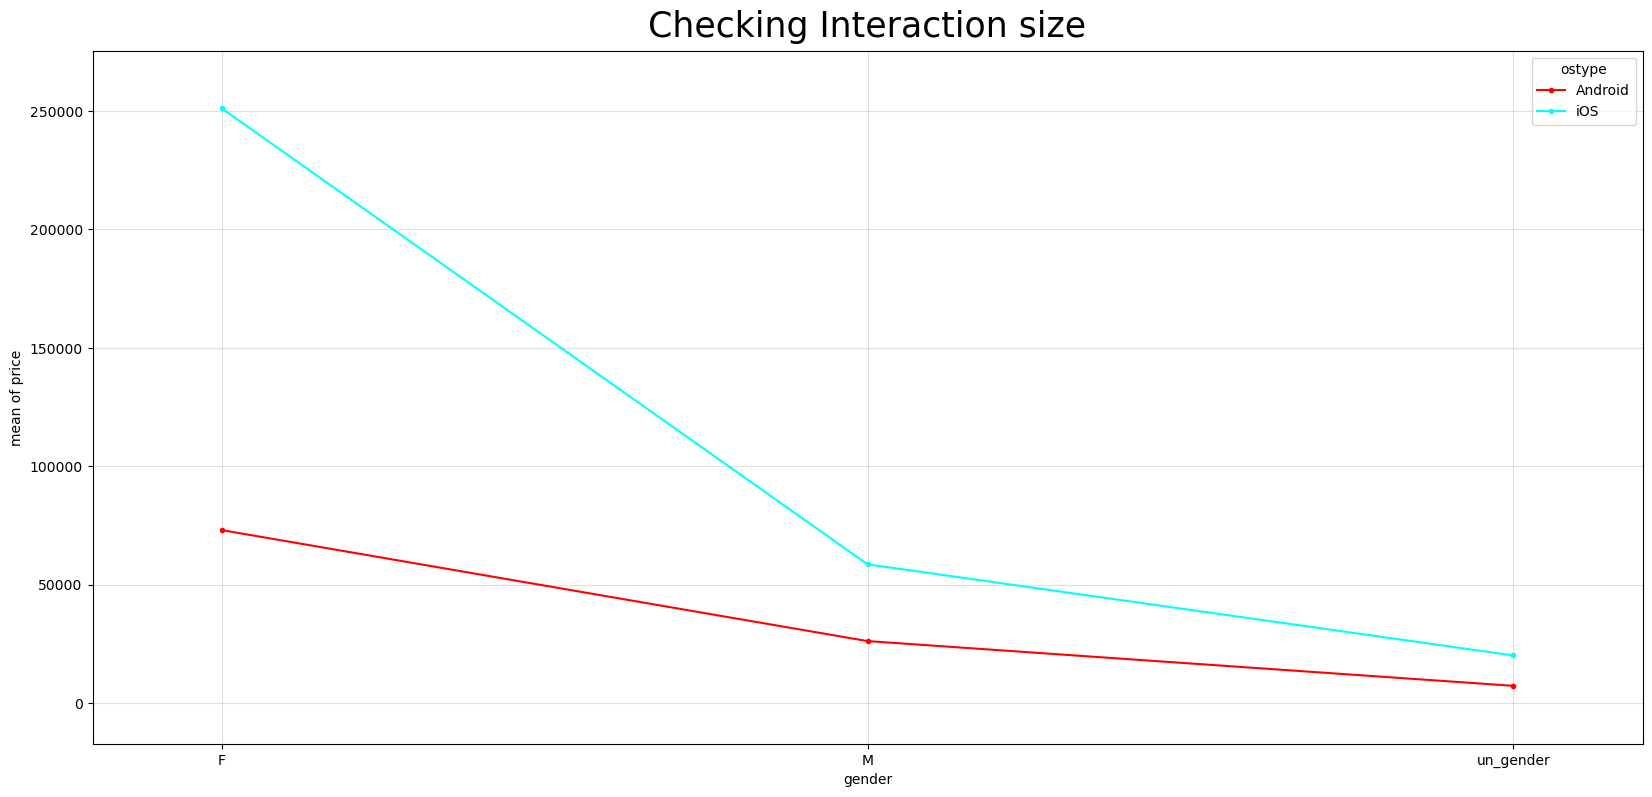

In [9]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 9)
 
 
fig = interaction_plot(x= table['gender']
                       , trace = table['ostype']
                       , response= table['price'], 
                      )
plt.title("Checking Interaction size", fontsize = 25, pad = 10)
plt.grid(alpha = 0.4);


In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## part1 상호 작용을 확인하기 위해서 모든 집단을 정의하는 코드
table['group_combination'] = table.gender + '-' + table.ostype
 
## part2 Tukey 사후 검정을 하기 위한 모델 선언
hsd = pairwise_tukeyhsd( table.query('gender == ["M", "F"]')['price']
                        , table.query('gender == ["M", "F"]')['group_combination'])
 
## 사후 검정 결과 확인
hsd_summary = hsd.summary()
hsd_summary


c:\Users\bongkyun\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\bongkyun\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


group1,group2,meandiff,p-adj,lower,upper,reject
F-Android,F-iOS,178145.0,nan,nan,nan,False
F-Android,M-Android,-46882.0,nan,nan,nan,False
F-Android,M-iOS,-14465.0,nan,nan,nan,False
F-iOS,M-Android,-225027.0,nan,nan,nan,False
F-iOS,M-iOS,-192610.0,nan,nan,nan,False
M-Android,M-iOS,32417.0,nan,nan,nan,False
